In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib as mpl
from ifanalysis import normalisation, figures

# Matplotlib Style and Colors
plt.style.use("/Users/hh65/matplotlib_style/Style_01.mplstyle")
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

# Set path to data and make directory to store figures
data_path = Path('./data')
figures_path = Path('./data/sample_figures')
figures_path.mkdir(exist_ok=True)

In [2]:
# get data into pandas
df1 = pd.read_csv(data_path / 'exp01.csv', index_col=0)
df2 = pd.read_csv(data_path / 'exp02.csv', index_col=0)
df3 = pd.read_csv(data_path / 'exp03.csv', index_col=0)
df = pd.concat([df1, df2, df3])

In [3]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60809 entries, 1 to 31
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   experiment                   60809 non-null  object 
 1   plate_id                     60809 non-null  int64  
 2   well                         60809 non-null  object 
 3   well_id                      60809 non-null  int64  
 4   image_id                     60809 non-null  int64  
 5   cell_line                    60809 non-null  object 
 6   condition                    60809 non-null  object 
 7   label                        60809 non-null  float64
 8   area_nucleus                 60809 non-null  float64
 9   intensity_max_DAPI_nucleus   60809 non-null  float64
 10  intensity_mean_DAPI_nucleus  60809 non-null  float64
 11  Cyto_ID                      60809 non-null  float64
 12  integrated_int_DAPI          60809 non-null  float64
 13  area_cell          

In [4]:
# check conditions
df.condition.unique()

array(['CCNA2', 'NT', 'CDK4', 'SCR', 'CDC27'], dtype=object)

In [5]:
#generate condition list
conditions = ['NT', 'SCR', 'CDK4', 'CCNA2', 'CDC27']

## Cell Count Analysis

In [6]:
# Analyse cell counts generates the average counts per condition and cell lines
# The relative counts are stored in the "norm_count" column
df_counts = normalisation.count_per_cond(df, 'SCR')
df_counts.head()

,cell_line,condition,well,plate_id,abs cell count,norm_count
0,RPE-1,CCNA2,D0,1155,234,0.184810
1,RPE-1,CCNA2,D0,1217,605,0.477820
2,RPE-1,CCNA2,D1,1155,216,0.170594
3,RPE-1,CCNA2,D1,1217,647,0.510991
4,RPE-1,CCNA2,D2,1054,399,0.315124


Saving figure Relative Cell Number_RPE-1


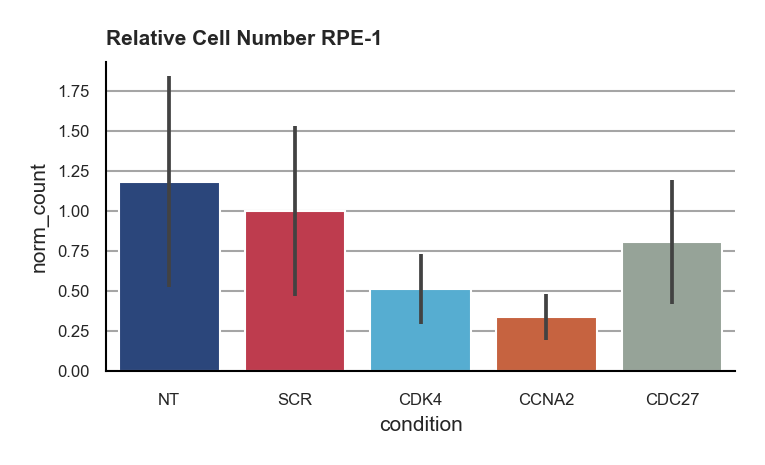

In [7]:
# generate cell count figure
figures.rel_cellnumber(df_counts, conditions, 'RPE-1', path=figures_path)

## Cell Cycle Analysis
- Normalisation of the single cell data and gating of the cell cycle phases is done using cellcycle_analysis function
- Plotting scatterplots and histograms of the cell cycle phases is done using cellcycleplot function

In [8]:
# cell cycle normalisation (best done for each experiment separately)
df_norm1 = normalisation.cellcycle_analysis(df1)
df_norm2 = normalisation.cellcycle_analysis(df2)
df_norm3 = normalisation.cellcycle_analysis(df3)
df_norm = pd.concat([df_norm1, df_norm2, df_norm3])

Saving figure Combined Cell Cycle Plot_RPE-1


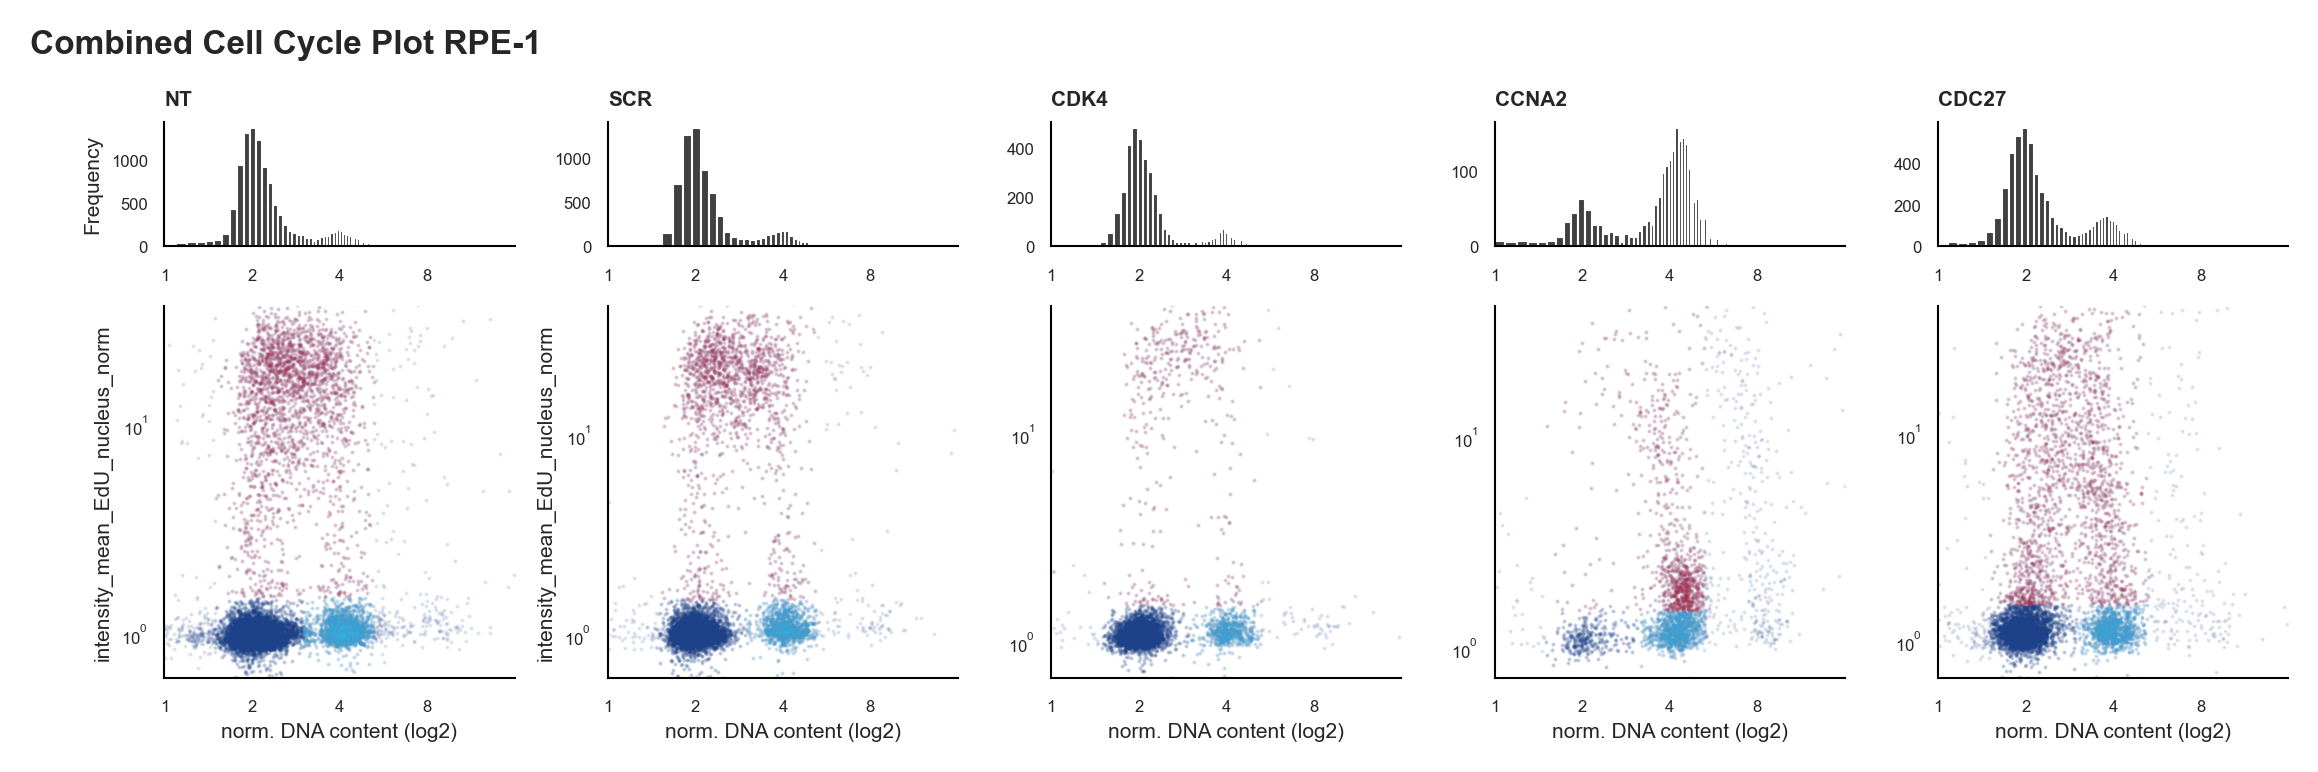

In [9]:
# generate cell cycle figure
figures.cellcycleplot_comb(df_norm, conditions, 'RPE-1', bins=200, path=figures_path) # number of bins can be adjusted depending on sample size

Saving figure CellCycle Scatter Plot_RPE-1
Saving figure CellCycle Histogram_RPE-1


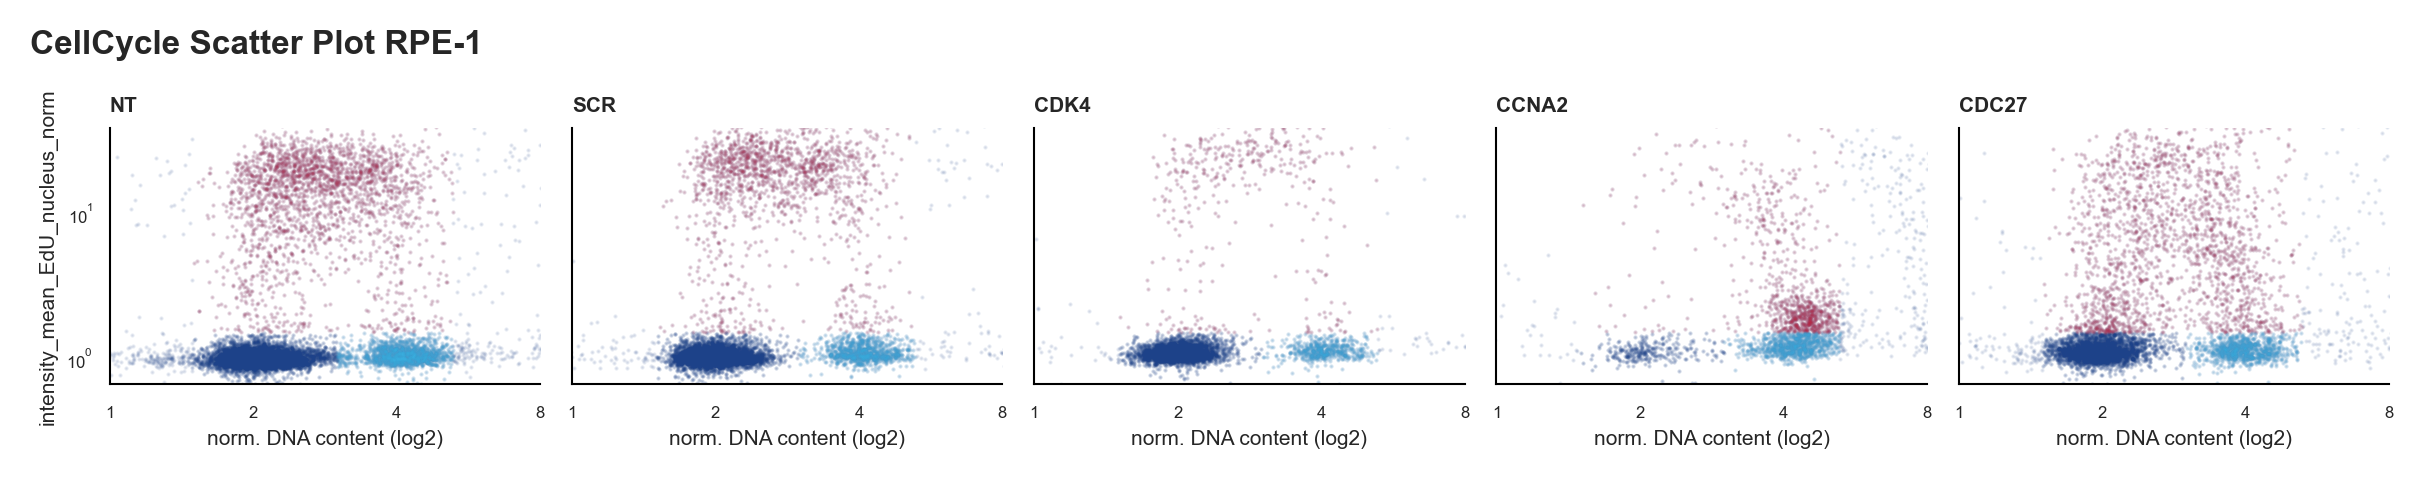

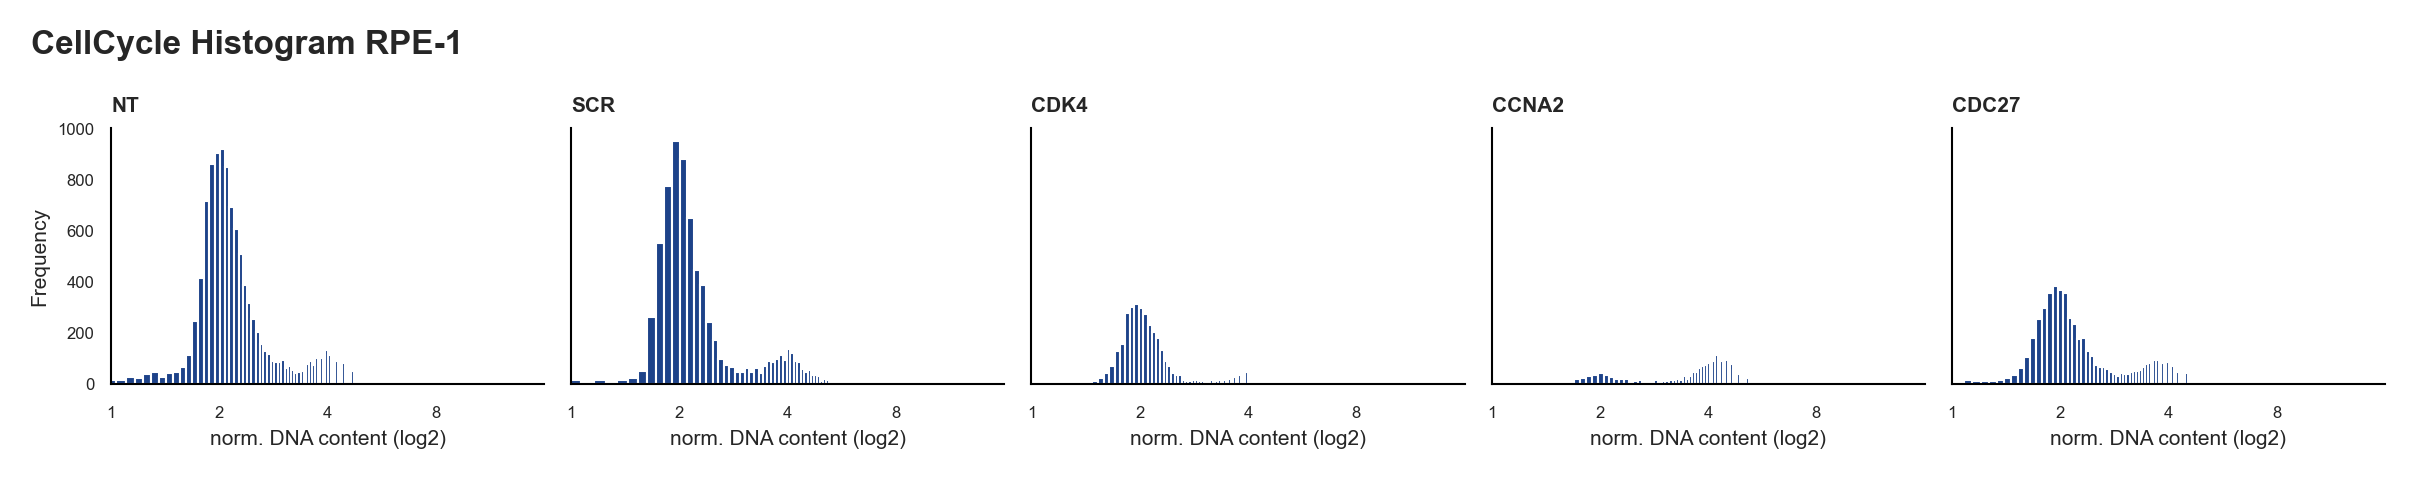

In [10]:
# If preferred scatterplots and histograms can be generated separately

figures.cellcycle_scatterplot(df_norm, conditions, 'RPE-1', path=figures_path)
figures.cellcycle_histplot(df_norm, conditions, 'RPE-1', bins=300, path=figures_path) # number of bins can be adjusted depending on sample size

Saving figure CellCycle Summary Barplot


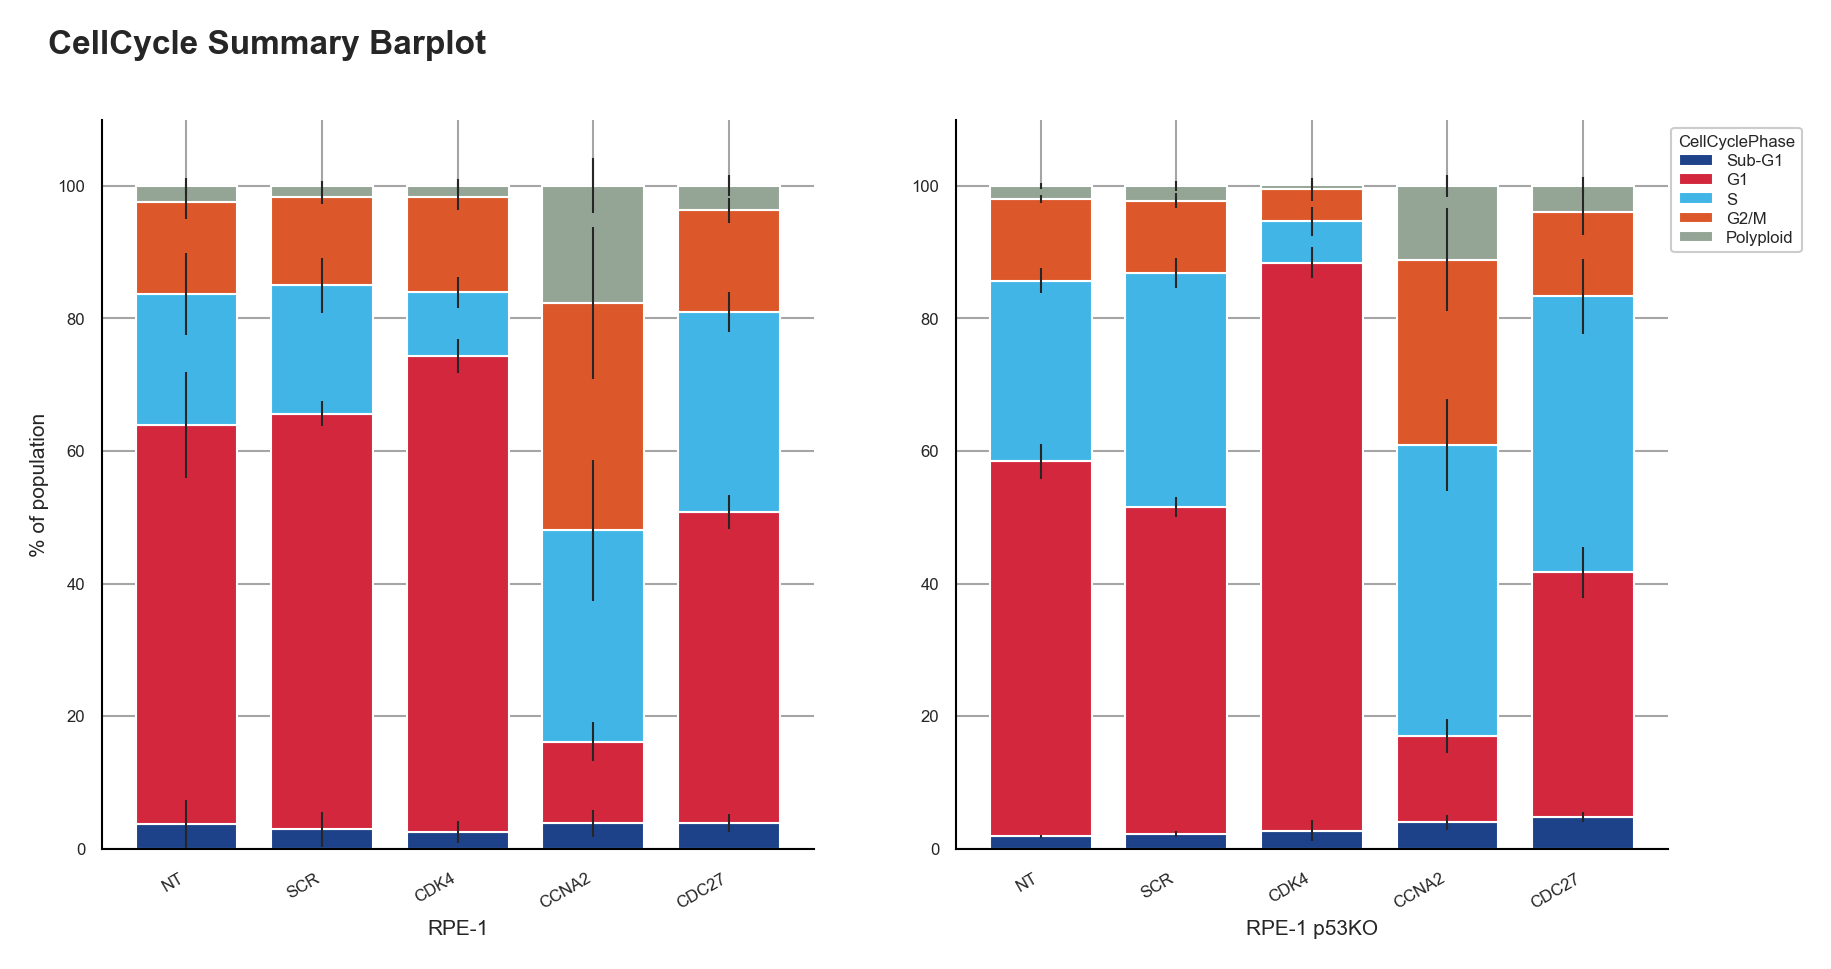

In [11]:
# calculate proportion of cells in each phase per condition
df_prop = normalisation.cellcycle_prop(df_norm)
figures.cellcycle_barplot(df_prop, conditions, path=figures_path)